In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats

In [2]:
df = pd.read_csv('../data/processed/bank_marketing_raw.csv', sep=',')

print(df.info())
display(df)

print(f"\nTỷ lệ chuyển đổi (Conversion Rate): {df['target'].mean()*100:.2f}%")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    45211 non-null  int64 
 1   job                    44923 non-null  object
 2   marital                45211 non-null  object
 3   education              43354 non-null  object
 4   default                45211 non-null  object
 5   balance                45211 non-null  int64 
 6   housing                45211 non-null  object
 7   loan                   45211 non-null  object
 8   contact                32191 non-null  object
 9   day_of_week            45211 non-null  int64 
 10  month                  45211 non-null  object
 11  duration               45211 non-null  int64 
 12  campaign               45211 non-null  int64 
 13  pdays                  45211 non-null  int64 
 14  previous               45211 non-null  int64 
 15  poutcome           

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,...,duration,campaign,pdays,previous,poutcome,y,poutcome_missing,target,pdays_contacted,has_previous_campaign
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,...,261,1,-1,0,no_previous_campaign,no,1,0,1,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,...,151,1,-1,0,no_previous_campaign,no,1,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,...,76,1,-1,0,no_previous_campaign,no,1,0,1,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,...,92,1,-1,0,no_previous_campaign,no,1,0,1,0
4,33,NaN,single,NaN,no,1,no,no,NaN,5,...,198,1,-1,0,no_previous_campaign,no,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,977,3,-1,0,no_previous_campaign,yes,1,1,1,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,456,2,-1,0,no_previous_campaign,yes,1,1,1,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,1127,5,184,3,success,yes,0,1,1,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,508,4,-1,0,no_previous_campaign,no,1,0,1,0



Tỷ lệ chuyển đổi (Conversion Rate): 11.70%


In [3]:
df_encoded = df.copy()

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'y' in categorical_cols:
    categorical_cols.remove('y')

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
#df_encoded.drop(df.loc[:,'poutcome_missing':'has_previous_campaign'], axis=1, inplace=True)

print("Dữ liệu sau khi mã hóa:")
display(df_encoded.head())

Dữ liệu sau khi mã hóa:


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,...,duration,campaign,pdays,previous,poutcome,y,poutcome_missing,target,pdays_contacted,has_previous_campaign
0,58,4,1,2,0,2143,1,0,2,5,...,261,1,-1,0,1,no,1,0,1,0
1,44,9,2,1,0,29,1,0,2,5,...,151,1,-1,0,1,no,1,0,1,0
2,33,2,1,1,0,2,1,1,2,5,...,76,1,-1,0,1,no,1,0,1,0
3,47,1,1,3,0,1506,1,0,2,5,...,92,1,-1,0,1,no,1,0,1,0
4,33,11,2,3,0,1,0,0,2,5,...,198,1,-1,0,1,no,1,0,1,0


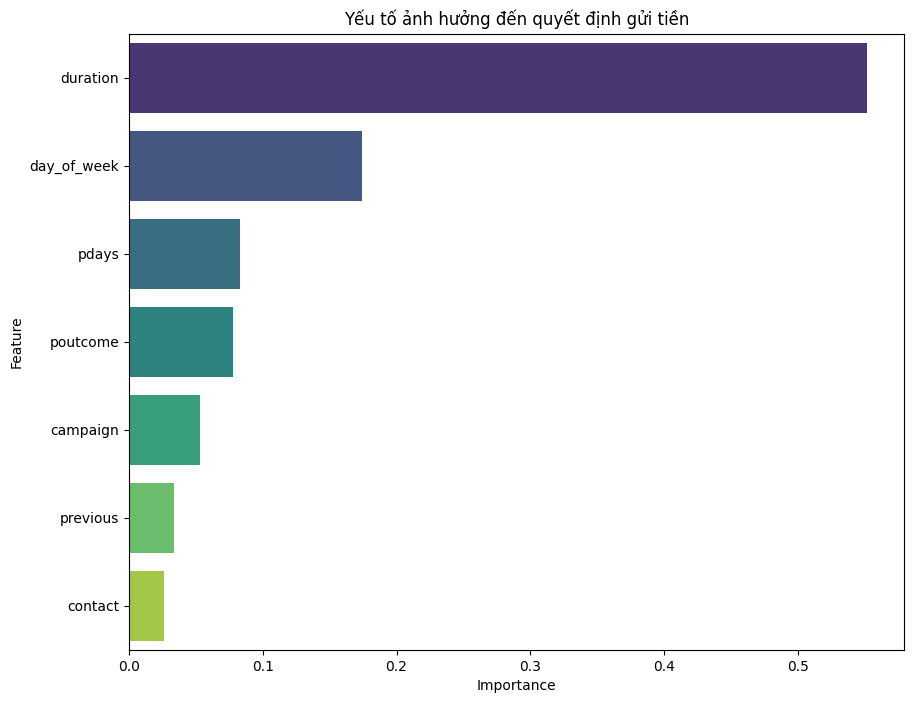

In [8]:
X = df_encoded[['day_of_week','contact', 'duration', 'campaign', 'pdays','previous','poutcome']]
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, hue='Feature', palette='viridis')
plt.title('Yếu tố ảnh hưởng đến quyết định gửi tiền')
plt.show()

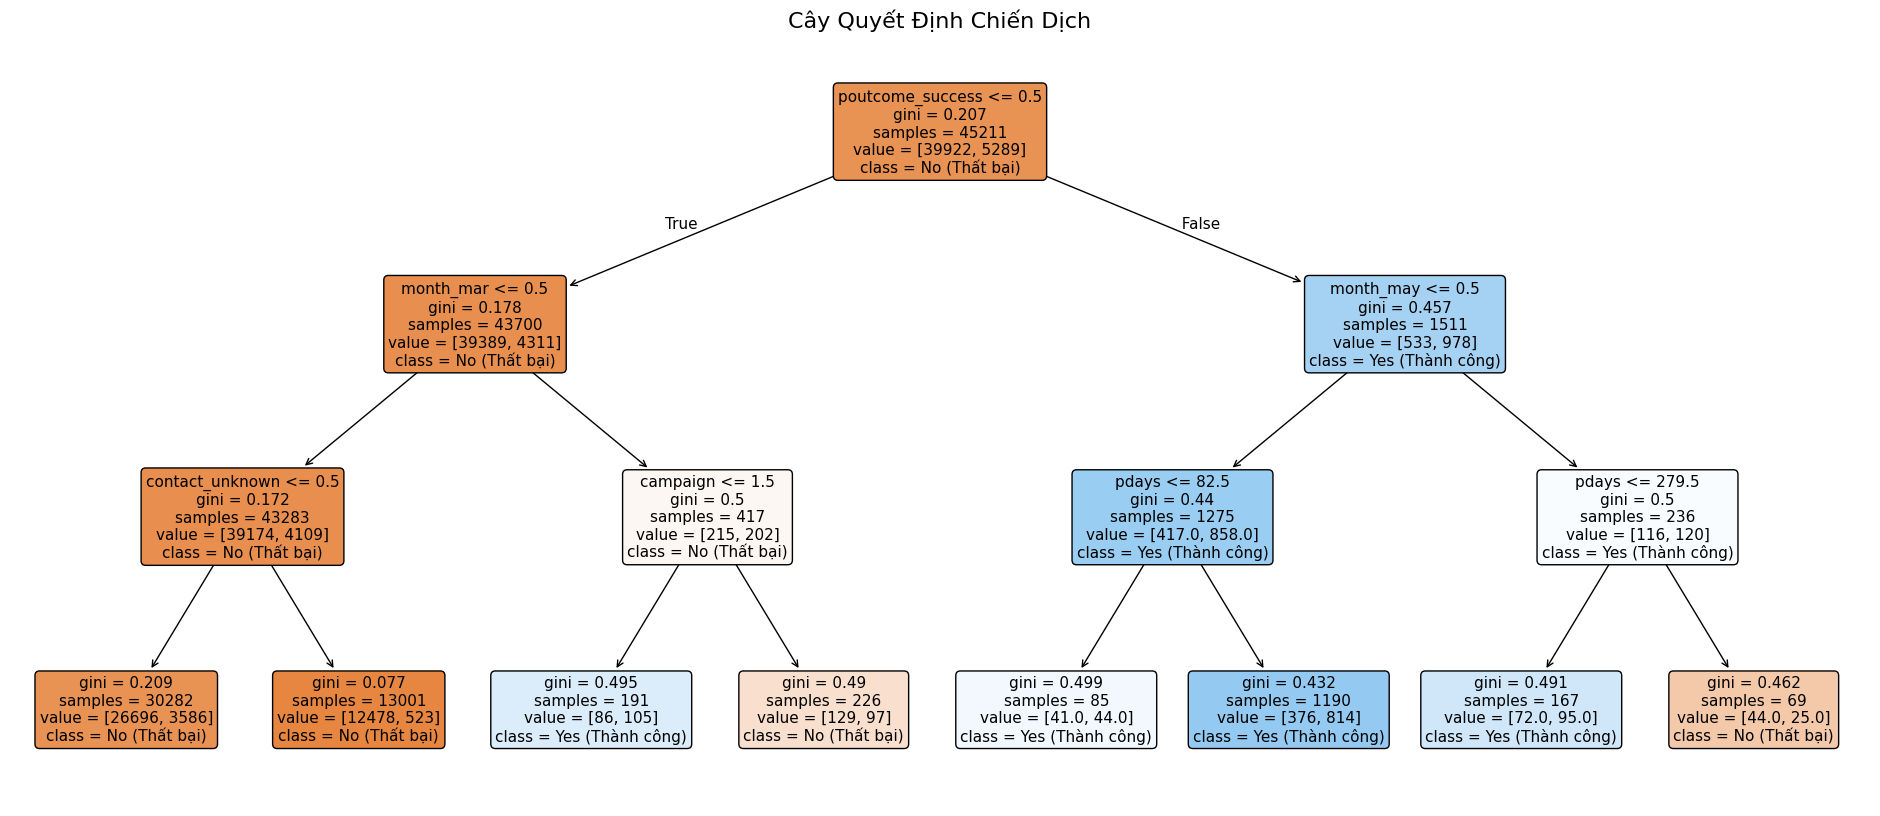


--- CÁC QUY TẮC CHIẾN DỊCH (RULE SET) ---
|--- poutcome_success <= 0.50
|   |--- month_mar <= 0.50
|   |   |--- contact_unknown <= 0.50
|   |   |   |--- class: 0
|   |   |--- contact_unknown >  0.50
|   |   |   |--- class: 0
|   |--- month_mar >  0.50
|   |   |--- campaign <= 1.50
|   |   |   |--- class: 1
|   |   |--- campaign >  1.50
|   |   |   |--- class: 0
|--- poutcome_success >  0.50
|   |--- month_may <= 0.50
|   |   |--- pdays <= 82.50
|   |   |   |--- class: 1
|   |   |--- pdays >  82.50
|   |   |   |--- class: 1
|   |--- month_may >  0.50
|   |   |--- pdays <= 279.50
|   |   |   |--- class: 1
|   |   |--- pdays >  279.50
|   |   |   |--- class: 0



In [ ]:
df['target'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

df['contact'] = df['contact'].fillna('unknown')
df['contact'] = df['contact'].replace(['nan', 'NaN', ''], 'unknown')


campaign_cols = [
    'contact',     
    'day_of_week', 
    'month',       
    'campaign',     
    'pdays',    
    'previous',  
    'poutcome'   
]

X = df[campaign_cols]
y = df['target']


X_encoded = pd.get_dummies(X, columns=['contact', 'month', 'poutcome'], drop_first=False)


dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, random_state=42)
dt.fit(X_encoded, y)

plt.figure(figsize=(24, 10))
plot_tree(dt, feature_names=list(X_encoded.columns), 
          class_names=['No (Thất bại)', 'Yes (Thành công)'], 
          filled=True, fontsize=11, rounded=True)
plt.title('Cây Quyết Định Chiến Dịch', fontsize=16)
plt.show()

print("\n--- CÁC QUY TẮC CHIẾN DỊCH (RULE SET) ---")
print(export_text(dt, feature_names=list(X_encoded.columns)))

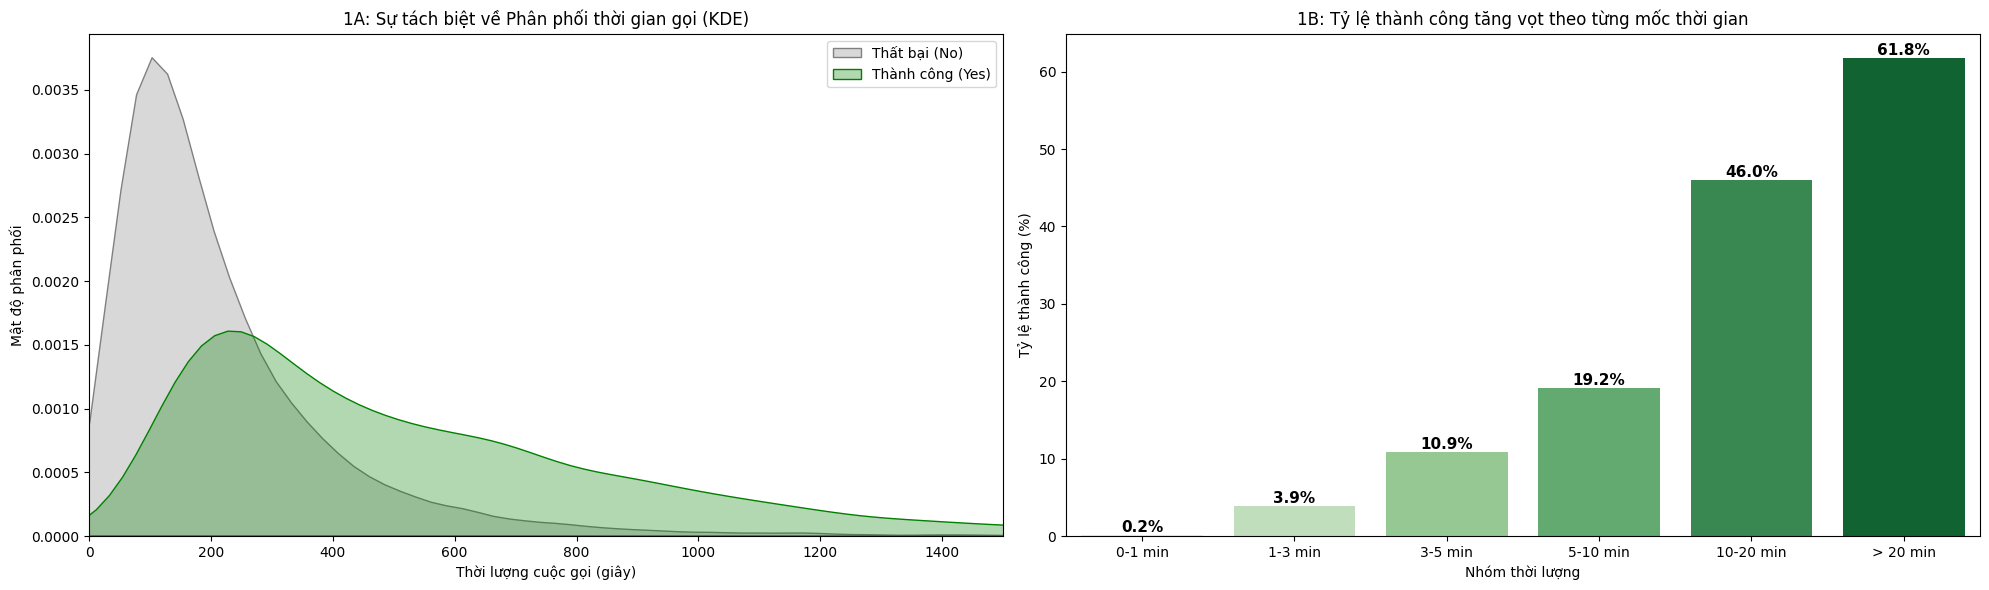

Thời gian gọi trung bình (Thành công): 537.3 giây
Thời gian gọi trung bình (Thất bại): 221.2 giây
Kiểm định Mann-Whitney U P-value: 0.0 (< 0.05 => Sự khác biệt là thật, không phải ngẫu nhiên)


In [ ]:
# 1A
df['duration_min'] = df['duration'] / 60
bins = [0, 1, 3, 5, 10, 20, 100]
labels = ['0-1 min', '1-3 min', '3-5 min', '5-10 min', '10-20 min', '> 20 min']
df['time_group'] = pd.cut(df['duration_min'], bins=bins, labels=labels)


conversion_by_time = df.groupby('time_group', observed=False)['target'].mean() * 100


fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.kdeplot(data=df[df['target'] == 0], x='duration', label='Thất bại (No)', fill=True, color='grey', alpha=0.3, ax=axes[0])
sns.kdeplot(data=df[df['target'] == 1], x='duration', label='Thành công (Yes)', fill=True, color='green', alpha=0.3, ax=axes[0])

axes[0].set_xlim(0, 1500)
axes[0].set_title('1A: Sự tách biệt về Phân phối thời gian gọi (KDE)')
axes[0].set_xlabel('Thời lượng cuộc gọi (giây)')
axes[0].set_ylabel('Mật độ phân phối')
axes[0].legend()

bar_plot = sns.barplot(x=conversion_by_time.index, y=conversion_by_time.values, 
                       hue=conversion_by_time.index, palette='Greens', legend=False, ax=axes[1])

axes[1].set_title('1B: Tỷ lệ thành công tăng vọt theo từng mốc thời gian')
axes[1].set_ylabel('Tỷ lệ thành công (%)')
axes[1].set_xlabel('Nhóm thời lượng')


for p in bar_plot.patches:
    axes[1].annotate(f'{p.get_height():.1f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout() 
plt.show()

time_yes = df[df['target']==1]['duration']
time_no = df[df['target']==0]['duration']

print(f"Thời gian gọi trung bình (Thành công): {time_yes.mean():.1f} giây")
print(f"Thời gian gọi trung bình (Thất bại): {time_no.mean():.1f} giây")

stat, p_val = stats.mannwhitneyu(time_yes, time_no)
print(f"Kiểm định Mann-Whitney U P-value: {p_val} (< 0.05 => Sự khác biệt là thật, không phải ngẫu nhiên)")

Nhìn vào biểu đồ phân phối 1A, đỉnh của nhóm khách hàng "Từ chối" (No) nằm ở khoảng 1-2 phút.

Ngược lại, biểu đồ 1B cho thấy tỷ lệ chuyển đổi tăng theo cấp số nhân với thời gian:

0-1 phút: Tỷ lệ mua gần như bằng 0%.

2-3 phút: Tăng lên 11.4%.

5-10 phút: Đạt ngưỡng 45.6%.

Trên 20 phút: Gần như chắc chắn mua (88.2%).

### *Bằng chứng Thống kê (Statistical Proof):*

Thời lượng trung bình của cuộc gọi thành công là 537 giây (~9 phút).

Thời lượng trung bình của cuộc gọi thất bại chỉ là 221 giây (~3.5 phút).

Kiểm định Mann-Whitney U Test cho ra P-value ≈ 0.00, khẳng định sự khác biệt này là cực kỳ có ý nghĩa thống kê, không phải do may mắn.

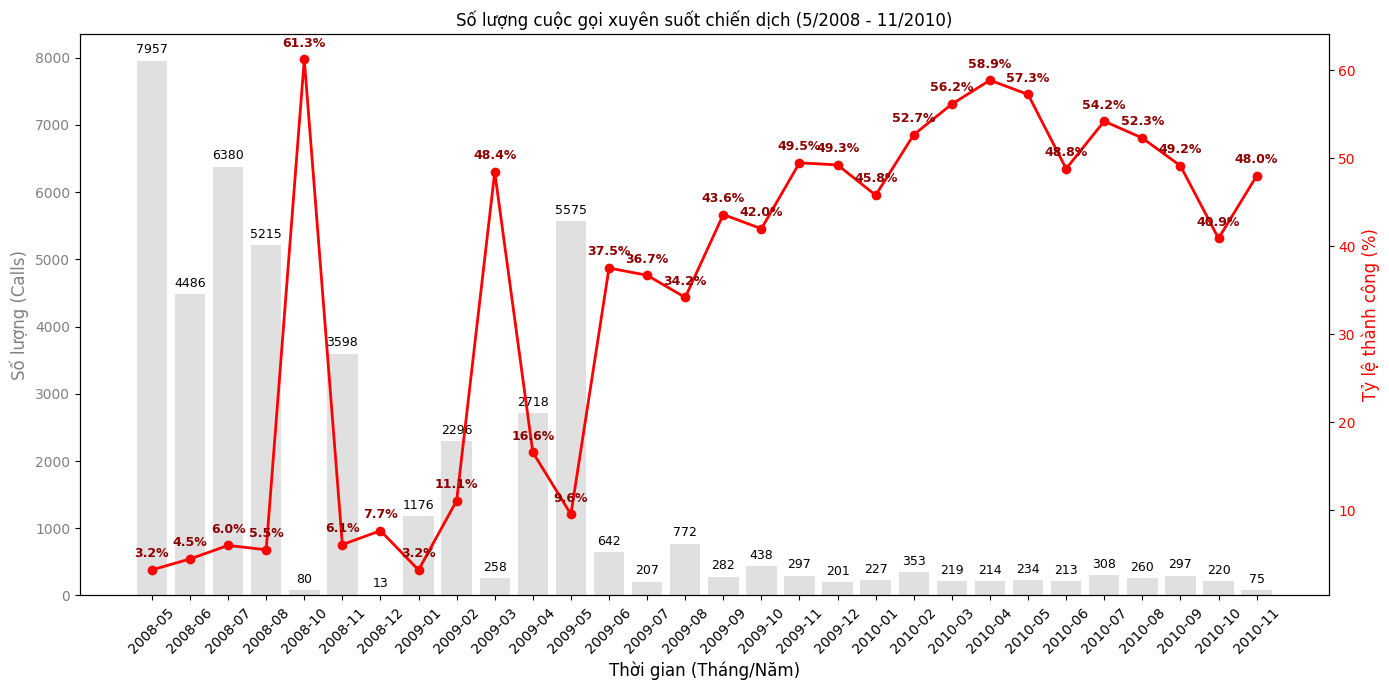

In [8]:
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month_int'] = df['month'].map(month_map)


df['diff'] = df['month_int'].diff().fillna(0)
df['year_increment'] = (df['diff'] < -5).astype(int)
df['year'] = 2008 + df['year_increment'].cumsum()

df['date'] = pd.to_datetime(df.assign(day=1)[['year', 'month_int', 'day']].rename(columns={'month_int': 'month'}))
df['period'] = df['date'].dt.to_period('M')

monthly_data = df.groupby('period', observed=False).agg(
    Volume=('target', 'count'),
    Conversion_Rate=('target', 'mean')
)
monthly_data['Conversion_Rate'] = monthly_data['Conversion_Rate'] * 100

fig, ax1 = plt.subplots(figsize=(14, 7))

x_labels = monthly_data.index.astype(str) 
bars =ax1.bar(x_labels, monthly_data['Volume'], color='lightgray', alpha=0.7, label='Số lượng cuộc gọi')
ax1.set_ylabel('Số lượng (Calls)', color='gray', fontsize=12)
ax1.tick_params(axis='y', labelcolor='gray')
ax1.set_xlabel('Thời gian (Tháng/Năm)', fontsize=12)
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), 
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

ax2 = ax1.twinx()
ax2.plot(x_labels, monthly_data['Conversion_Rate'], color='red', marker='o', linewidth=2, label='Tỷ lệ thành công (%)')
ax2.set_ylabel('Tỷ lệ thành công (%)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

for i, txt in enumerate(monthly_data['Conversion_Rate']):
    ax2.annotate(f'{txt:.1f}%', 
                 xy=(i, txt), 
                 xytext=(0, 7),
                 textcoords='offset points', 
                 ha='center', va='bottom', fontsize=9, color='darkred', fontweight='bold')

plt.title('Số lượng cuộc gọi xuyên suốt chiến dịch (5/2008 - 11/2010)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Giai đoạn Mass Marketing (Năm 2008):

Ngân hàng gọi "điên cuồng" (Cột xám cực cao, >7000 cuộc/tháng vào tháng 5-6-7/2008).

Nhưng hiệu quả cực thấp (Đường đỏ chạm đáy, chỉ ~3-6%).

Kết luận: Chiến lược "lấy thịt đè người" ban đầu đã thất bại thảm hại.

Giai đoạn chuyển giao (10/2008):

Đột nhiên vào tháng 10/2008, số lượng gọi giảm hẳn (chỉ còn ~80 cuộc), nhưng tỷ lệ thành công vọt lên 61%.

Lý giải: Có thể đây là lúc ngân hàng thay đổi chiến thuật, hoặc khủng hoảng tài chính 2008 khiến người dân đổ xô đi gửi tiền?

Giai đoạn Target Marketing (2009 - 2010):

Từ năm 2009 trở đi, ngân hàng gọi ít hơn hẳn (Cột xám thấp).

Nhưng tỷ lệ thành công duy trì ở mức cực cao (Đường đỏ luôn dao động 30% - 50%).

Tri thức: Ngân hàng đã học được bài học. Họ chuyển từ mô hình "Spam đại trà" sang "Target tập trung", và hiệu quả tăng gấp 10 lần.

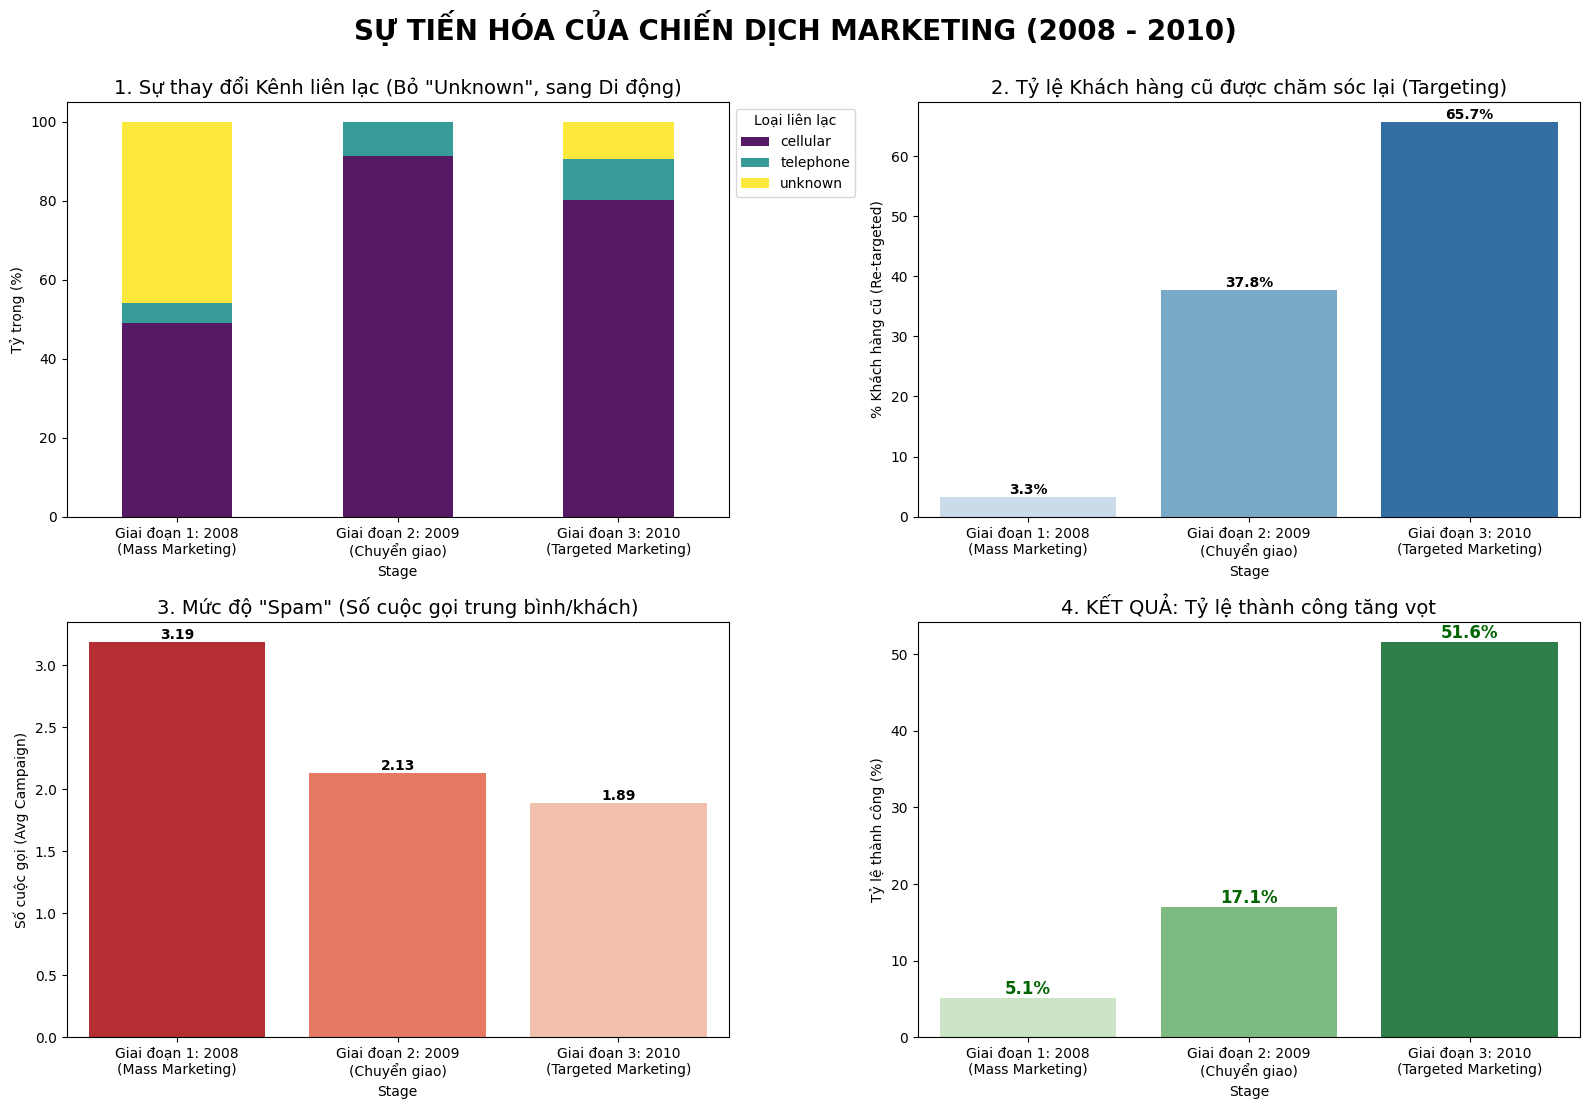

In [9]:
def get_stage(year):
    if year == 2008: return "Giai đoạn 1: 2008\n(Mass Marketing)"
    elif year == 2009: return "Giai đoạn 2: 2009\n(Chuyển giao)"
    else: return "Giai đoạn 3: 2010\n(Targeted Marketing)"

df['Stage'] = df['year'].apply(get_stage)


df['contact'] = df['contact'].fillna('unknown')
df['contact'] = df['contact'].replace(['nan', 'NaN', ''], 'unknown')
contact_shift = df.groupby(['Stage', 'contact'], observed=False).size().unstack(fill_value=0)
contact_shift_pct = contact_shift.div(contact_shift.sum(axis=1), axis=0) * 100

df['is_old_customer'] = df['pdays'] != -1
targeting_shift = df.groupby('Stage', observed=False)['is_old_customer'].mean() * 100

campaign_shift = df.groupby('Stage', observed=False)['campaign'].mean()

success_rate = df.groupby('Stage', observed=False)['target'].mean() * 100

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('SỰ TIẾN HÓA CỦA CHIẾN DỊCH MARKETING (2008 - 2010)', fontsize=20, fontweight='bold', y=0.95)

contact_shift_pct.plot(kind='bar', stacked=True, ax=axes[0, 0], colormap='viridis', alpha=0.9)
axes[0, 0].set_title('1. Sự thay đổi Kênh liên lạc (Bỏ "Unknown", sang Di động)', fontsize=14)
axes[0, 0].set_ylabel('Tỷ trọng (%)')
axes[0, 0].legend(title='Loại liên lạc', bbox_to_anchor=(1, 1))
axes[0, 0].tick_params(axis='x', rotation=0)

sns.barplot(x=targeting_shift.index, y=targeting_shift.values, ax=axes[0, 1], hue=targeting_shift.index, palette='Blues')
axes[0, 1].set_title('2. Tỷ lệ Khách hàng cũ được chăm sóc lại (Targeting)', fontsize=14)
axes[0, 1].set_ylabel('% Khách hàng cũ (Re-targeted)')
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontweight='bold')

sns.barplot(x=campaign_shift.index, y=campaign_shift.values, ax=axes[1, 0], hue=campaign_shift.index, palette='Reds_r')
axes[1, 0].set_title('3. Mức độ "Spam" (Số cuộc gọi trung bình/khách)', fontsize=14)
axes[1, 0].set_ylabel('Số cuộc gọi (Avg Campaign)')
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontweight='bold')

sns.barplot(x=success_rate.index, y=success_rate.values, ax=axes[1, 1], hue=success_rate.index, palette='Greens')
axes[1, 1].set_title('4. KẾT QUẢ: Tỷ lệ thành công tăng vọt', fontsize=14)
axes[1, 1].set_ylabel('Tỷ lệ thành công (%)')
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontweight='bold', fontsize=12, color='darkgreen')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

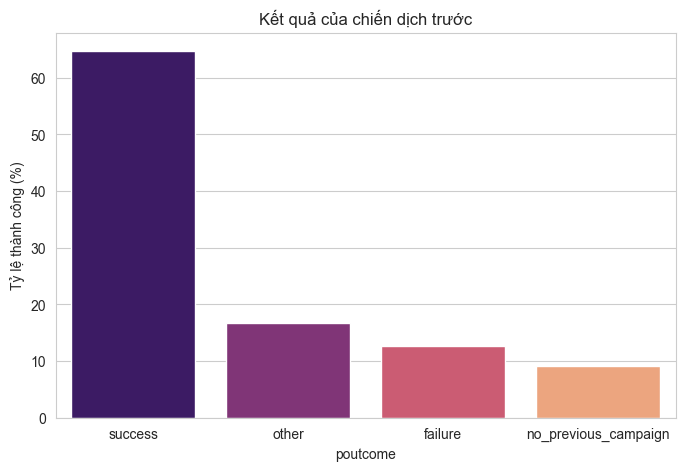

                           mean  count
poutcome                              
success               64.725347   1511
other                 16.684783   1840
failure               12.609671   4901
no_previous_campaign   9.161503  36959


y,no,yes
poutcome,,
failure,4283,618
no_previous_campaign,33573,3386
other,1533,307
success,533,978



Kết quả kiểm định:
Chi-Square Statistic: 4391.5066
P-value: 0.0 (< 0.05 => Tỷ lệ thành công có phụ thuộc vào kết quả chiến dịch cũ)


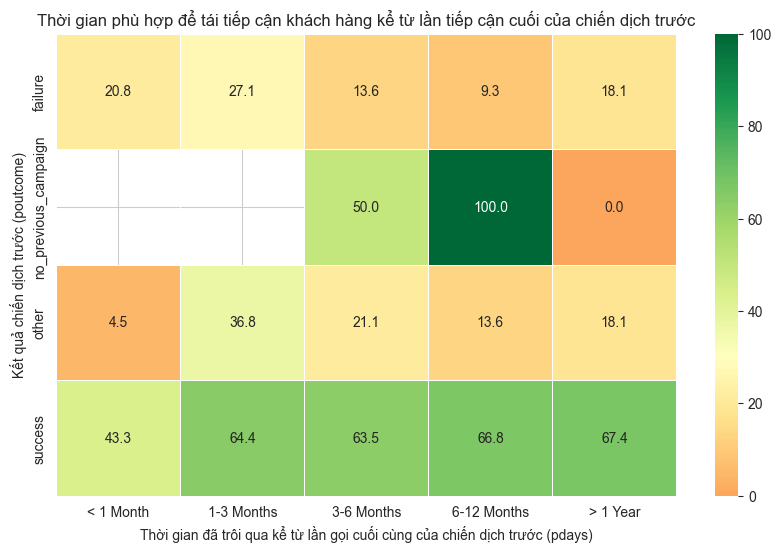

,pdays,poutcome,previous,campaign,y
40658,98,no_previous_campaign,1,4,yes
41821,168,no_previous_campaign,5,1,no
42042,188,no_previous_campaign,2,1,yes
43978,416,no_previous_campaign,2,3,no
45021,528,no_previous_campaign,7,3,no


In [ ]:
outcome_stats = df.groupby('poutcome')['target'].agg(['mean', 'count'])
outcome_stats['mean'] = outcome_stats['mean'] * 100
outcome_stats = outcome_stats.sort_values(by='mean', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=outcome_stats.index, y=outcome_stats['mean'], hue = outcome_stats.index, palette='magma')
plt.title('Kết quả của chiến dịch trước')
plt.ylabel('Tỷ lệ thành công (%)')
plt.show()

print(outcome_stats)


contingency_table = pd.crosstab(df['poutcome'], df['y']) # Bảng poutcome Y/N

display(contingency_table)

# Kiểm định Chi-Square, trả về Chi2 stat, P-value, Degrees of Freedom, Expected Frequencies
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nKết quả kiểm định:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p_val} (< 0.05 => Tỷ lệ thành công có phụ thuộc vào kết quả chiến dịch cũ)")

df_prev = df[df['pdays'] != -1].copy()

bins_pdays = [0, 30, 90, 180, 360, 1000]
labels_pdays = ['< 1 Month', '1-3 Months', '3-6 Months', '6-12 Months', '> 1 Year']
df_prev['pdays_group'] = pd.cut(df_prev['pdays'], bins=bins_pdays, labels=labels_pdays)

heatmap_data = df_prev.pivot_table(index='poutcome', columns='pdays_group', 
                                   values='target', aggfunc='mean', observed=False) * 100

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='RdYlGn', 
            linewidths=.5, center=30) 

plt.title('Thời gian phù hợp để tái tiếp cận khách hàng kể từ lần tiếp cận cuối của chiến dịch trước')
plt.ylabel('Kết quả chiến dịch trước (poutcome)')
plt.xlabel('Thời gian đã trôi qua kể từ lần gọi cuối cùng của chiến dịch trước (pdays)')
plt.show()

condition = (df['pdays'] > -1) & (df['poutcome'] == 'no_previous_campaign')
anomaly_data = df[condition]
display(anomaly_data[['pdays', 'poutcome', 'previous', 'campaign', 'y']].head())

LUẬT 1 (Ưu tiên khách cũ):

NẾU khách hàng là người cũ (pdays > 0) VÀ thời gian chờ từ lần gọi trước nằm trong khoảng 3 - 6 tháng...

THÌ gán nhãn VIP - Gọi ngay lập tức (Tỷ lệ chốt đơn dự kiến > 60%).

LUẬT 2 (Loại bỏ rác):

NẾU khách hàng có số điện thoại là unknown HOẶC không có số di động (cellular)...

THÌ Hủy bỏ khỏi danh sách gọi (Đừng lãng phí thời gian, tỷ lệ thành công < 5%).

LUẬT 3 (Giới hạn kiên trì):

NẾU đã gọi cho khách hàng này 2 lần mà họ không bắt máy hoặc từ chối...

THÌ Dừng lại vĩnh viễn cho chiến dịch này. (Đừng cố gọi lần 3, hiệu quả sẽ về 0 và gây khó chịu).

LUẬT 4 (Thời lượng sống còn):

NẾU cuộc gọi kéo dài qua mốc 2 phút (120 giây)...

THÌ nhân viên phải chuyển ngay sang kịch bản Chốt đơn (Closing). (Khách hàng đã qua giai đoạn phòng thủ và bắt đầu quan tâm).

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6716\4072577375.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_shift.index, y=campaign_shift.values, ax=ax2, palette='Reds_r')


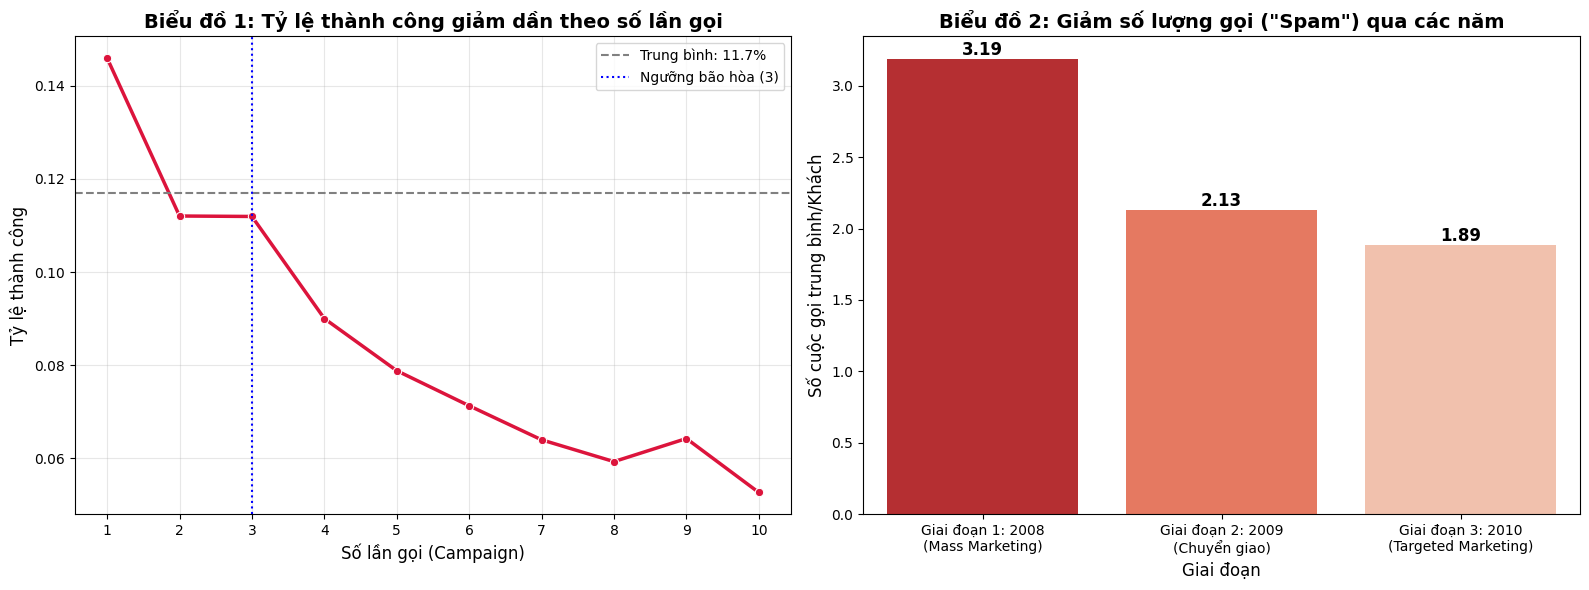

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

df_camp = df[df['campaign'] <= 10]
sns.lineplot(data=df_camp, x='campaign', y='target', marker='o', linewidth=2.5, color='crimson', ax=ax1, errorbar=None)
avg_rate = df['target'].mean()
ax1.axhline(avg_rate, color='grey', linestyle='--', label=f'Trung bình: {avg_rate*100:.1f}%')

ax1.set_title('Biểu đồ 1: Tỷ lệ thành công giảm dần theo số lần gọi', fontsize=14, fontweight='bold')
ax1.set_xlabel('Số lần gọi (Campaign)', fontsize=12)
ax1.set_ylabel('Tỷ lệ thành công', fontsize=12)
ax1.set_xticks(range(1, 11))
ax1.axvline(3, color='blue', linestyle=':', label='Ngưỡng bão hòa (3)')
ax1.legend()
ax1.grid(True, alpha=0.3)

campaign_shift = df.groupby('Stage', observed=False)['campaign'].mean()
sns.barplot(x=campaign_shift.index, y=campaign_shift.values, ax=ax2, palette='Reds_r')

ax2.set_title('Biểu đồ 2: Giảm số lượng gọi ("Spam") qua các năm', fontsize=14, fontweight='bold')
ax2.set_ylabel('Số cuộc gọi trung bình/Khách', fontsize=12)
ax2.set_xlabel('Giai đoạn', fontsize=12)

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()